In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [80]:
df = pd.read_csv("mcdonalds.csv")

In [82]:
print("Column names:", df.columns.tolist())
print("Shape of dataset:", df.shape)
print("\nFirst 3 rows:")
print(df.head(3))

Column names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Shape of dataset: (1453, 15)

First 3 rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [84]:
md_x = (df.iloc[:, 0:11] == "Yes").astype(int)
col_means = md_x.mean().round(2)
print("\nProportion of 'Yes' per column:\n", col_means)


Proportion of 'Yes' per column:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [86]:
pca = PCA()
pca_fit = pca.fit(md_x)

# Print PCA results
print("\nPCA Summary:")
pca_summary = pd.DataFrame({
    "Standard Deviation": np.round(np.sqrt(pca_fit.explained_variance_), 2),
    "Proportion of Variance": np.round(pca_fit.explained_variance_ratio_, 4),
    "Cumulative Proportion": np.round(pca_fit.explained_variance_ratio_.cumsum(), 4)
}, index=[f"PC{i+1}" for i in range(md_x.shape[1])])
print(pca_summary)
print("\nPCA Loadings:")
print(pd.DataFrame(pca_fit.components_, columns=md_x.columns))


PCA Summary:
      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1                 0.76                  0.2994                 0.2994
PC2                 0.61                  0.1928                 0.4922
PC3                 0.50                  0.1330                 0.6253
PC4                 0.40                  0.0831                 0.7084
PC5                 0.34                  0.0595                 0.7679
PC6                 0.31                  0.0503                 0.8182
PC7                 0.29                  0.0438                 0.8620
PC8                 0.28                  0.0395                 0.9016
PC9                 0.27                  0.0368                 0.9383
PC10                0.25                  0.0324                 0.9707
PC11                0.24                  0.0293                 1.0000

PCA Loadings:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0   0.476933    0.155332  0.

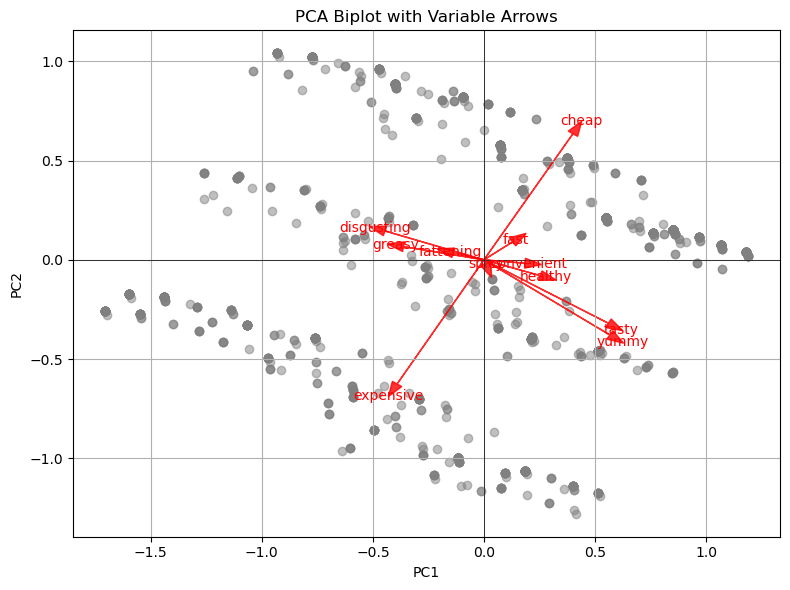

In [88]:
md_scores = pca.transform(md_x)
plt.figure(figsize=(8, 6))
plt.scatter(md_scores[:, 0], md_scores[:, 1], color='gray', alpha=0.5)

# Draw arrows for each variable
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x * max(md_scores[:, 0]), y * max(md_scores[:, 1]),
              color='red', alpha=0.8, head_width=0.05)
    plt.text(x * max(md_scores[:, 0]) * 1.1, y * max(md_scores[:, 1]) * 1.1,
             md_x.columns[i], color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot with Variable Arrows")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

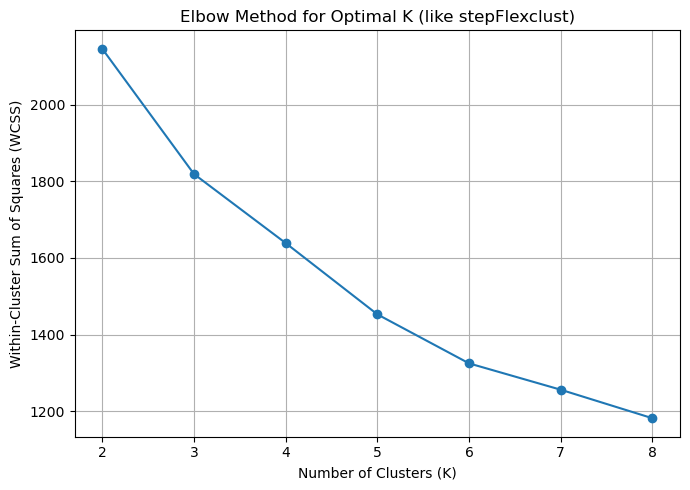

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(1234)

wcss = []
k_values = range(2, 9)

for k in k_values:
    best_inertia = np.inf
    for _ in range(10):
        random_state = np.random.randint(0, 10000)
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=random_state)
        kmeans.fit(md_x)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
    wcss.append(best_inertia)

plt.figure(figsize=(7, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K (like stepFlexclust)")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


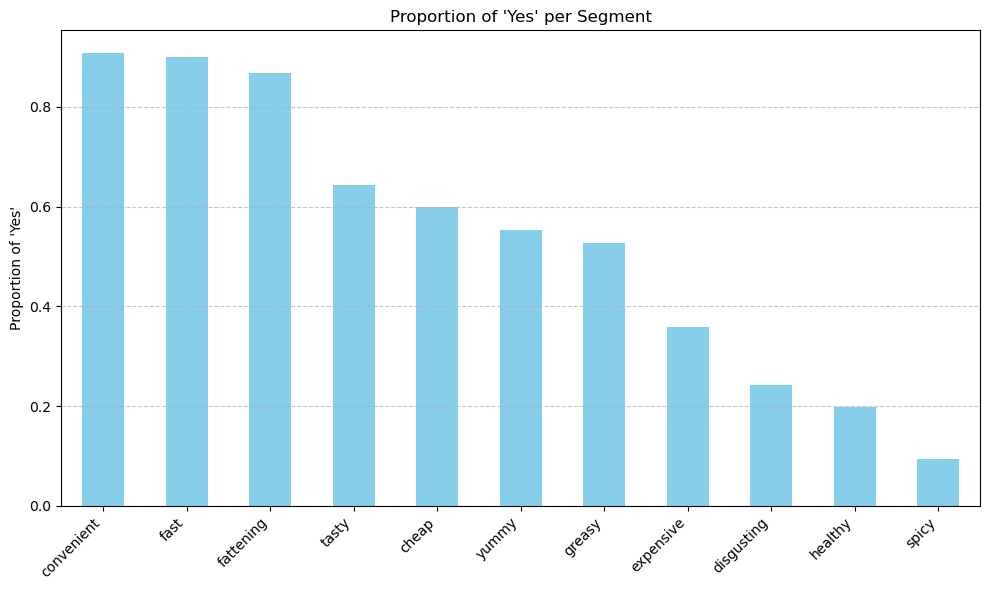

In [92]:
# Bar plot of proportion of "Yes" 
import matplotlib.pyplot as plt

col_means = md_x.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
col_means.plot(kind='bar', color='skyblue')
plt.ylabel("Proportion of 'Yes'")
plt.title("Proportion of 'Yes' per Segment")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Starting stability analysis with common elements ARI...
Processing k = 2 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 2. Collected 100 ARI scores. Avg ARI: 0.953
Processing k = 3 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=3


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=3


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=3


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=3


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=3


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 3. Collected 100 ARI scores. Avg ARI: 0.888
Processing k = 4 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=4


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=4


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=4


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=4


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=4


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 4. Collected 100 ARI scores. Avg ARI: 0.843
Processing k = 5 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=5


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=5


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=5


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=5


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=5


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 5. Collected 100 ARI scores. Avg ARI: 0.772
Processing k = 6 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=6


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=6


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=6


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=6


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=6


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 6. Collected 100 ARI scores. Avg ARI: 0.700
Processing k = 7 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=7


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=7


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=7


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=7


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=7


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 7. Collected 100 ARI scores. Avg ARI: 0.668
Processing k = 8 segments...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 20/100 for k=8


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 40/100 for k=8


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 60/100 for k=8


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 80/100 for k=8


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap comparison 100/100 for k=8


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  Finished k = 8. Collected 100 ARI scores. Avg ARI: 0.659
Stability analysis complete.

Descriptive statistics of ARI scores:
                    count      mean       std       min       25%       50%  \
Number of Segments                                                            
2                   100.0  0.952727  0.036410  0.844610  0.925771  0.960717   
3                   100.0  0.888374  0.117755  0.515041  0.842637  0.926517   
4                   100.0  0.843001  0.100153  0.450296  0.795173  0.855631   
5                   100.0  0.772180  0.165752  0.457526  0.596741  0.822816   
6                   100.0  0.700421  0.126524  0.376281  0.611573  0.697071   
7                   100.0  0.668443  0.118037  0.370818  0.583586  0.691087   
8                   100.0  0.658508  0.090536  0.471872  0.589867  0.659034   

                         75%       max  
Number of Segments                      
2                   0.985664  1.000000  
3                   0.968412  1.000000

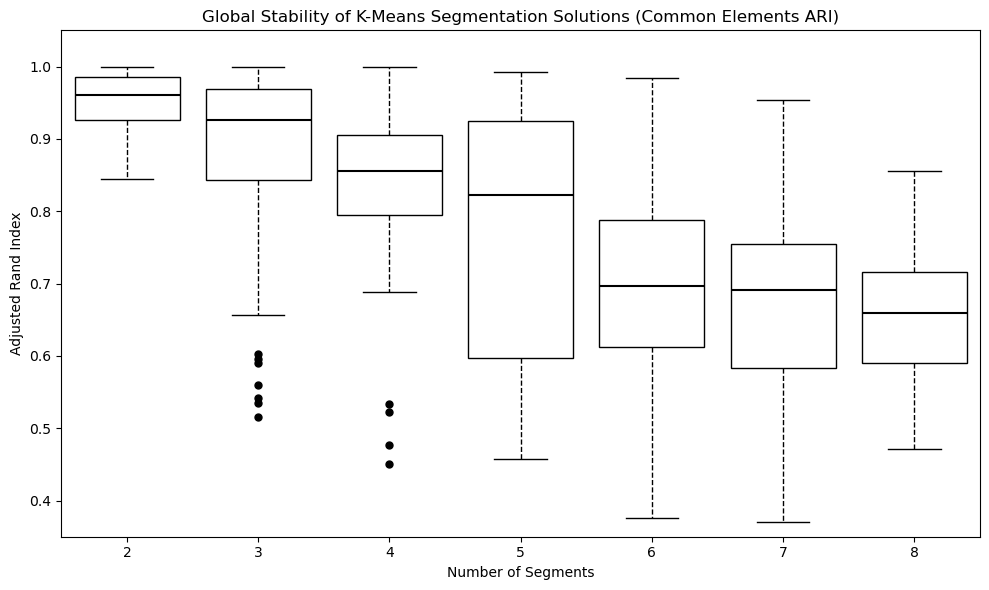

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from collections import defaultdict
import random

if 'md_x' not in locals() and 'mcdonalds' in locals():
    md_x_df = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)
    md_x_numpy = md_x_df.values
else:
    if isinstance(md_x, pd.DataFrame):
        md_x_numpy = md_x.values
    else:
        md_x_numpy = md_x

seed_value = 1234
random.seed(seed_value)
np.random.seed(seed_value)

n_bootstrap_comparisons = 100
n_init_kmeans = 10
k_range = range(2, 9)

stability_scores_for_plot = {k: [] for k in k_range}
original_indices = np.arange(md_x_numpy.shape[0])

print("Starting stability analysis with common elements ARI...")

for k_val in k_range:
    print(f"Processing k = {k_val} segments...")
    aris_for_k = []
    for i in range(n_bootstrap_comparisons):
        if (i + 1) % 20 == 0:
            print(f"  Bootstrap comparison {i+1}/{n_bootstrap_comparisons} for k={k_val}")

        bootstrap_indices1 = resample(original_indices, replace=True, n_samples=len(original_indices), random_state=seed_value + i)
        bootstrap_indices2 = resample(original_indices, replace=True, n_samples=len(original_indices), random_state=seed_value + i + n_bootstrap_comparisons)

        data_bs1 = md_x_numpy[bootstrap_indices1]
        data_bs2 = md_x_numpy[bootstrap_indices2]

        kmeans1 = KMeans(n_clusters=k_val, n_init=n_init_kmeans, random_state=seed_value + i*2, algorithm='lloyd')
        kmeans2 = KMeans(n_clusters=k_val, n_init=n_init_kmeans, random_state=seed_value + i*2 + 1, algorithm='lloyd')

        labels_bs1_full = kmeans1.fit_predict(data_bs1)
        labels_bs2_full = kmeans2.fit_predict(data_bs2)

        map1 = defaultdict(list)
        for orig_idx, label in zip(bootstrap_indices1, labels_bs1_full):
            map1[orig_idx].append(label)

        map2 = defaultdict(list)
        for orig_idx, label in zip(bootstrap_indices2, labels_bs2_full):
            map2[orig_idx].append(label)

        common_idx = list(set(map1.keys()) & set(map2.keys()))

        if len(common_idx) < 2:
            continue

        labels_common1 = [map1[idx][0] for idx in common_idx]
        labels_common2 = [map2[idx][0] for idx in common_idx]

        ari = adjusted_rand_score(labels_common1, labels_common2)
        aris_for_k.append(ari)

    stability_scores_for_plot[k_val] = aris_for_k
    if aris_for_k:
        print(f"  Finished k = {k_val}. Collected {len(aris_for_k)} ARI scores. Avg ARI: {np.mean(aris_for_k):.3f}")
    else:
        print(f"  Finished k = {k_val}. No ARI scores collected.")

print("Stability analysis complete.")

df_plot_seaborn = pd.DataFrame([
    {"Number of Segments": k, "Adjusted Rand Index": score}
    for k, scores_list in stability_scores_for_plot.items()
    for score in scores_list
])

if df_plot_seaborn.empty:
    print("No stability scores were computed successfully. Cannot generate plot.")
else:
    print("\nDescriptive statistics of ARI scores:")
    print(df_plot_seaborn.groupby("Number of Segments")["Adjusted Rand Index"].describe())

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=df_plot_seaborn,
                color="white",
                medianprops={'color': 'black', 'linewidth': 1.5},
                whiskerprops={'color': 'black', 'linestyle': '--'},
                capprops={'color': 'black'},
                flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 5, 'markeredgecolor': 'black'},
                boxprops={'edgecolor': 'black'}
               )

    plt.xlabel("Number of Segments")
    plt.ylabel("Adjusted Rand Index")
    plt.title("Global Stability of K-Means Segmentation Solutions (Common Elements ARI)")

    min_val = df_plot_seaborn["Adjusted Rand Index"].min()
    max_val = df_plot_seaborn["Adjusted Rand Index"].max()

    y_lower_bound = 0.35
    y_upper_bound = 1.05

    if max_val < y_lower_bound or min_val > y_upper_bound:
        y_lower_bound = min_val - 0.05 * abs(min_val) if min_val != 0 else -0.05
        y_upper_bound = max_val + 0.05 * abs(max_val) if max_val != 0 else 0.05
        if y_upper_bound - y_lower_bound < 0.1:
            y_upper_bound = y_lower_bound + 0.1

    plt.ylim(y_lower_bound, y_upper_bound)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Segment Means (Proportion of 'Yes' for k=4):
                Var1      Var2      Var3      Var4      Var5      Var6  \
Cluster_k4                                                               
0           0.325581  0.255814  0.348837  0.697674  0.813953  0.046512   
1           0.134615  0.500000  0.576923  0.653846  0.423077  0.942308   
2           0.944444  0.648148  0.407407  0.370370  0.925926  0.777778   
3           0.862745  0.450980  0.666667  0.392157  0.019608  0.235294   

                Var7      Var8      Var9     Var10     Var11  
Cluster_k4                                                    
0           0.465116  0.232558  0.441860  0.581395  0.302326  
1           0.250000  0.480769  0.634615  0.538462  0.730769  
2           0.740741  0.870370  0.611111  0.388889  0.388889  
3           0.666667  0.470588  0.549020  0.352941  0.725490  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4676\2302548234.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


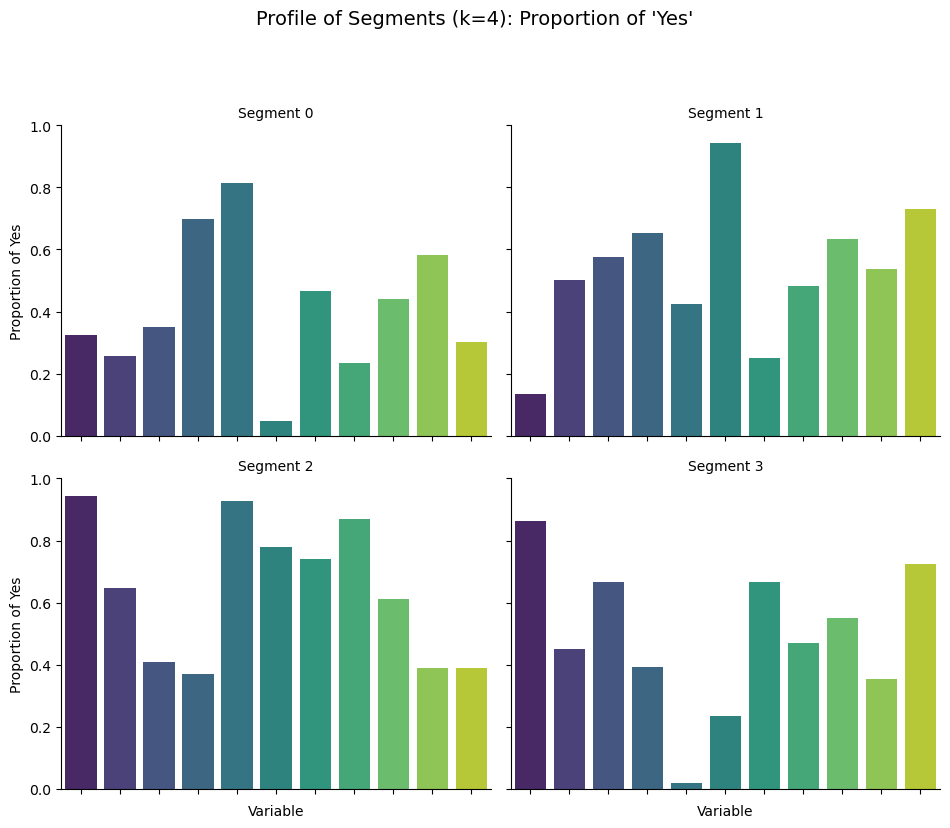

In [66]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
if 'md_x' not in locals() and 'mcdonalds' in locals():
    md_x_df = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)
elif 'md_x' in locals():
    if isinstance(md_x, pd.DataFrame):
        md_x_df = md_x
    else:
        md_x_df = pd.DataFrame(md_x, columns=mcdonalds.iloc[:, 0:11].columns)
else:
    raise ValueError("Error: 'mcdonalds' DataFrame or 'md_x' (0/1 data) not found. Please define it.")
k_for_histogram = 4
n_init_kmeans_final = 10
seed_value = 1234
np.random.seed(seed_value)
random.seed(seed_value)
kmeans_model_k4 = KMeans(
    n_clusters=k_for_histogram,
    n_init=n_init_kmeans_final,
    random_state=seed_value,
    algorithm='lloyd'
)
cluster_labels_k4 = kmeans_model_k4.fit_predict(md_x_df)
md_x_with_k4_clusters = md_x_df.copy()
md_x_with_k4_clusters['Cluster_k4'] = cluster_labels_k4
segment_means_k4 = md_x_with_k4_clusters.groupby('Cluster_k4').mean()
print("\nSegment Means (Proportion of 'Yes' for k=4):")
print(segment_means_k4)
segment_means_k4_melted = segment_means_k4.reset_index().melt(
    id_vars='Cluster_k4',
    var_name='Variable',
    value_name='Proportion of Yes'
)
g = sns.catplot(
    x="Variable",
    y="Proportion of Yes",
    col="Cluster_k4",
    data=segment_means_k4_melted,
    kind="bar",
    col_wrap=2,
    height=4,
    aspect=1.2,
    palette="viridis",
    sharex=True,
    sharey=True
)
g.set_xticklabels(rotation=45, ha='right')
g.set_titles("Segment {col_name}")
g.set(ylim=(0, 1))

plt.suptitle(f"Profile of Segments (k={k_for_histogram}): Proportion of 'Yes'", y=1.03, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Starting SLSW stability analysis for k=4...


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap iteration 20/100


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap iteration 40/100


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap iteration 60/100


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap iteration 80/100


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

  Bootstrap iteration 100/100
SLSW stability analysis complete.

Descriptive statistics of SLSW Jaccard scores:
                count      mean       std       min       25%       50%  \
Segment Number                                                            
1               100.0  0.403919  0.145325  0.107692  0.280687  0.395122   
2               100.0  0.432863  0.154664  0.176471  0.318630  0.399496   
3               100.0  0.584093  0.168922  0.260000  0.443802  0.593216   
4               100.0  0.476202  0.150052  0.196429  0.358073  0.471536   

                     75%       max  
Segment Number                      
1               0.490854  0.852941  
2               0.511382  0.878788  
3               0.718599  0.875000  
4               0.603846  0.774194  


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


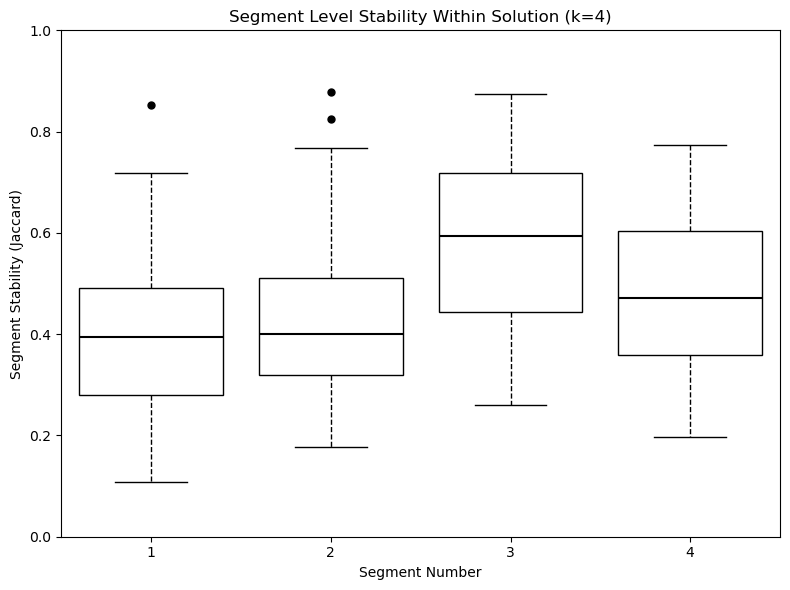

In [64]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

np.random.seed(1234)
random.seed(1234)
md_x = pd.DataFrame(
    np.random.randint(0, 2, size=(200, 11)),
    columns=[f"Var{i+1}" for i in range(11)]
)

md_x_df = md_x
md_x_numpy = md_x.values

k_target = 4
n_init_kmeans_final = 10
seed_value = 1234
n_bootstrap_slsw = 100
n_init_kmeans_bootstrap = 10

kmeans_final_k4 = KMeans(n_clusters=k_target,
                         n_init=n_init_kmeans_final,
                         random_state=seed_value,
                         algorithm='lloyd')
cluster_labels_k4_final = kmeans_final_k4.fit_predict(md_x_numpy)

slsw_stability_scores = {segment_id: [] for segment_id in range(k_target)}
original_indices_all = np.arange(md_x_numpy.shape[0])

print(f"\nStarting SLSW stability analysis for k={k_target}...")

for i_boot in range(n_bootstrap_slsw):
    if (i_boot + 1) % 20 == 0:
        print(f"  Bootstrap iteration {i_boot + 1}/{n_bootstrap_slsw}")

    bootstrap_indices = resample(original_indices_all, replace=True, n_samples=len(original_indices_all),
                                 random_state=seed_value + i_boot)
    data_bs = md_x_numpy[bootstrap_indices]

    kmeans_bs = KMeans(n_clusters=k_target,
                       n_init=n_init_kmeans_bootstrap,
                       random_state=seed_value + i_boot + n_bootstrap_slsw,
                       algorithm='lloyd')
    labels_bs_full = kmeans_bs.fit_predict(data_bs)

    for s_orig_id in range(k_target):
        original_indices_in_segment_s = original_indices_all[cluster_labels_k4_final == s_orig_id]

        common_orig_idx_in_s_and_bs = []
        positions_in_bootstrap_for_common = []
        bootstrap_indices_set = set(bootstrap_indices)

        map_orig_idx_to_bs_positions = {orig_idx: [] for orig_idx in bootstrap_indices_set}
        for bs_pos, orig_idx in enumerate(bootstrap_indices):
            map_orig_idx_to_bs_positions[orig_idx].append(bs_pos)

        for orig_idx_s in original_indices_in_segment_s:
            if orig_idx_s in bootstrap_indices_set:
                common_orig_idx_in_s_and_bs.append(orig_idx_s)
                positions_in_bootstrap_for_common.append(map_orig_idx_to_bs_positions[orig_idx_s][0])

        if len(common_orig_idx_in_s_and_bs) < 2:
            slsw_stability_scores[s_orig_id].append(0.0)
            continue

        labels_of_common_points_in_bs_clustering = labels_bs_full[positions_in_bootstrap_for_common]
        if not labels_of_common_points_in_bs_clustering.size:
            slsw_stability_scores[s_orig_id].append(0.0)
            continue

        modal_bs_cluster_id = Counter(labels_of_common_points_in_bs_clustering).most_common(1)[0][0]

        set_A_orig_indices = set(common_orig_idx_in_s_and_bs)
        set_B_orig_indices = set(bootstrap_indices[labels_bs_full == modal_bs_cluster_id])

        intersection_count = len(set_A_orig_indices.intersection(set_B_orig_indices))
        union_count = len(set_A_orig_indices.union(set_B_orig_indices))
        jaccard = intersection_count / union_count if union_count > 0 else 0.0

        slsw_stability_scores[s_orig_id].append(jaccard)

print("SLSW stability analysis complete.\n")

df_slsw_plot = pd.DataFrame([
    {"Segment Number": str(seg_id + 1), "Segment Stability (Jaccard)": score}
    for seg_id, scores_list in slsw_stability_scores.items()
    for score in scores_list
])

if df_slsw_plot.empty:
    print("No SLSW stability scores were computed.")
else:
    print("Descriptive statistics of SLSW Jaccard scores:")
    print(df_slsw_plot.groupby("Segment Number")["Segment Stability (Jaccard)"].describe())

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Segment Number", y="Segment Stability (Jaccard)", data=df_slsw_plot,
                color="white",
                medianprops={'color': 'black', 'linewidth': 1.5},
                whiskerprops={'color': 'black', 'linestyle': '--'},
                capprops={'color': 'black'},
                flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 5, 'markeredgecolor': 'black'},
                boxprops={'edgecolor': 'black'})
    plt.xlabel("Segment Number")
    plt.ylabel("Segment Stability (Jaccard)")
    plt.title(f"Segment Level Stability Within Solution (k={k_target})")
    plt.ylim(0, 1)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


Gaussian Mixture Model Results:



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 2
  Converged: True
  Log Likelihood: 29810.18
  AIC: -59358.37
  BIC: -58666.51
  ICL (approx): -58666.51



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 3
  Converged: True
  Log Likelihood: 35747.41
  AIC: -71100.82
  BIC: -70060.39
  ICL (approx): -70060.39



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 4
  Converged: True
  Log Likelihood: 42338.86
  AIC: -84151.72
  BIC: -82762.71
  ICL (approx): -82762.71



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 5
  Converged: True
  Log Likelihood: 44173.91
  AIC: -87689.81
  BIC: -85952.24
  ICL (approx): -85952.24



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 6
  Converged: True
  Log Likelihood: 47115.71
  AIC: -93441.42
  BIC: -91355.28
  ICL (approx): -91355.28



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 7
  Converged: True
  Log Likelihood: 47032.36
  AIC: -93142.97
  BIC: -90708.25
  ICL (approx): -90694.66



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Components: 8
  Converged: True
  Log Likelihood: 48030.22
  AIC: -95006.44
  BIC: -92223.15
  ICL (approx): -92223.11



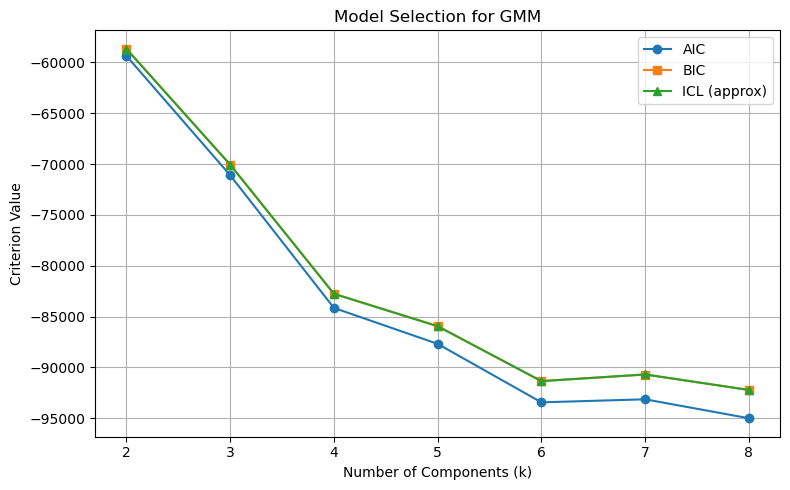

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(1234)
if 'md_x' not in locals():
    md_x = pd.DataFrame(np.random.randint(0, 2, size=(200, 11)), columns=[f"Var{i+1}" for i in range(11)])

aic_values = []
bic_values = []
icl_values = []

print("Gaussian Mixture Model Results:\n")

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(md_x)

    log_likelihood = model.lower_bound_ * len(md_x)
    log_prob_norm = model.score_samples(md_x)
    predicted_labels = model.predict(md_x)

    responsibilities = model.predict_proba(md_x)
    entropy = -np.sum(responsibilities * np.log(responsibilities + 1e-10), axis=1).sum()
    icl = model.bic(md_x) + entropy

    aic_values.append(model.aic(md_x))
    bic_values.append(model.bic(md_x))
    icl_values.append(icl)

    print(f"Components: {k}")
    print(f"  Converged: {model.converged_}")
    print(f"  Log Likelihood: {log_likelihood:.2f}")
    print(f"  AIC: {aic_values[-1]:.2f}")
    print(f"  BIC: {bic_values[-1]:.2f}")
    print(f"  ICL (approx): {icl_values[-1]:.2f}")
    print()

plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='s', label='BIC')
plt.plot(range(2, 9), icl_values, marker='^', label='ICL (approx)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Criterion Value')
plt.title('Model Selection for GMM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import random

seed_value = 1234
np.random.seed(seed_value)
random.seed(seed_value)

if 'md_x_df' not in locals():
    md_x_df = pd.DataFrame(np.random.randint(0, 2, size=(100, 11)),
                           columns=[f"Var{i+1}" for i in range(11)])

k_val_kmeans = 4
kmeans_model_k4 = KMeans(n_clusters=k_val_kmeans, n_init=10, random_state=seed_value, algorithm='lloyd')
kmeans_labels_k4 = kmeans_model_k4.fit_predict(md_x_df)

gmm_model = GaussianMixture(n_components=k_val_kmeans, n_init=10, random_state=seed_value)
gmm_labels = gmm_model.fit_predict(md_x_df)

contingency_table = pd.crosstab(
    pd.Series(kmeans_labels_k4, name='KMeans Labels'),
    pd.Series(gmm_labels, name='GMM Labels')
)

print("\n--- Cross-tabulation: K-Means vs GMM for k=4 ---")
print(contingency_table)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi


--- Cross-tabulation: K-Means vs GMM for k=4 ---
GMM Labels       0    1    2    3
KMeans Labels                    
0               31   51  268   14
1                4  214    0   22
2              143    0  362   28
3                0    3    0  313


<Figure size 1200x800 with 0 Axes>

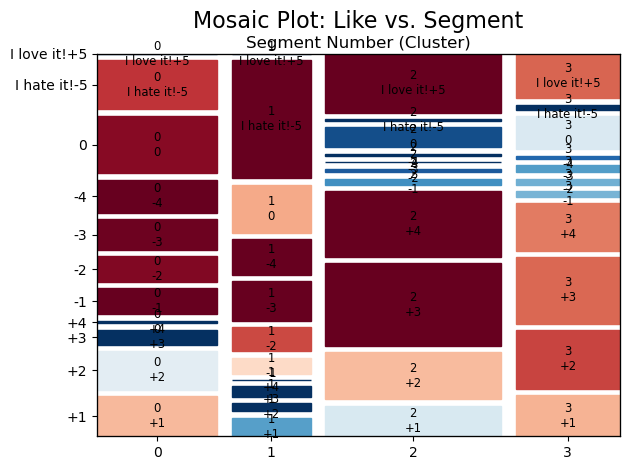

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
contingency_table_like = pd.crosstab(cluster_labels_k4, mcdonalds['Like'])
chi2, p, dof, expected = chi2_contingency(contingency_table_like)
residuals = (contingency_table_like - expected) / expected**0.5
residuals.index = residuals.index.astype(str)
residuals.columns = residuals.columns.astype(str)
props = lambda key: {
    'color': plt.cm.RdBu_r((residuals.loc[key[0], key[1]] + 4) / 8)
}
plt.figure(figsize=(12, 8))
mosaic(contingency_table_like.stack(), properties=props, gap=0.03)
plt.title("Mosaic Plot: Like vs. Segment", fontsize=16)
plt.xlabel("Segment Number (Cluster)", fontsize=12)
plt.ylabel("Like Score", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


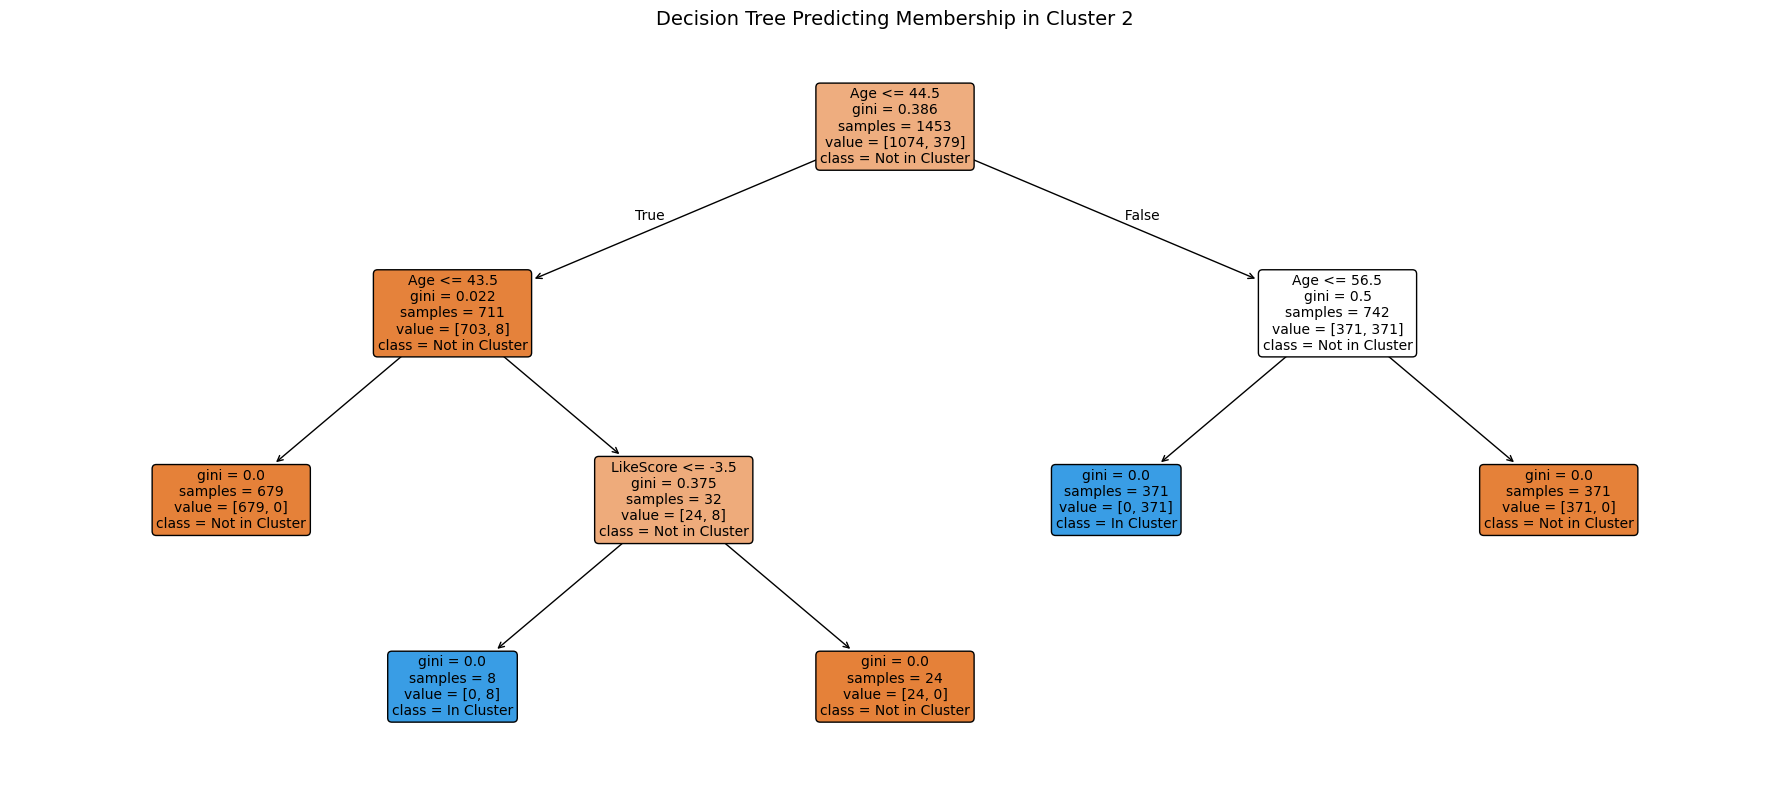

In [56]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def convert_like_column(value):
    try:
        return int(value)
    except:
        if isinstance(value, str) and '!' in value:
            try:
                return int(value.split('!')[-1])
            except:
                return np.nan
        return np.nan
mcdonalds['LikeScore'] = mcdonalds['Like'].apply(convert_like_column)
mcdonalds['LikeScore'] = mcdonalds['LikeScore'].fillna(mcdonalds['LikeScore'].median())

# Convert categorical variables to dummy variables for clustering
cluster_features = mcdonalds[['Age', 'VisitFrequency', 'Gender', 'LikeScore']].copy()
md_x = pd.get_dummies(cluster_features, columns=['VisitFrequency', 'Gender'])
model_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = model_k4.fit_predict(md_x)

# Choose a target cluster
target_label = 2
y = (cluster_labels == target_label).astype(int)
X_tree = md_x.copy()  
clf_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_tree.fit(X_tree, y)

plt.figure(figsize=(18, 8))
plot_tree(clf_tree,
          feature_names=X_tree.columns,
          class_names=['Not in Cluster', 'In Cluster'],
          filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree Predicting Membership in Cluster {target_label}", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Mean VisitFrequency (numeric) per cluster (k4):
 k4_cluster
0    1.708791
1    1.408333
2    3.000000
3    2.860759
Name: VisitFrequency_numeric, dtype: float64
------------------------------
Mean Like_n per cluster (k4):
 k4_cluster
0   -1.175824
1   -2.670833
2    2.834897
3    2.174051
Name: Like_n, dtype: float64
------------------------------
Mean proportion of Females per cluster (k4):
 k4_cluster
0    0.585165
1    0.420833
2    0.607880
3    0.474684
Name: Female_numeric, dtype: float64
------------------------------


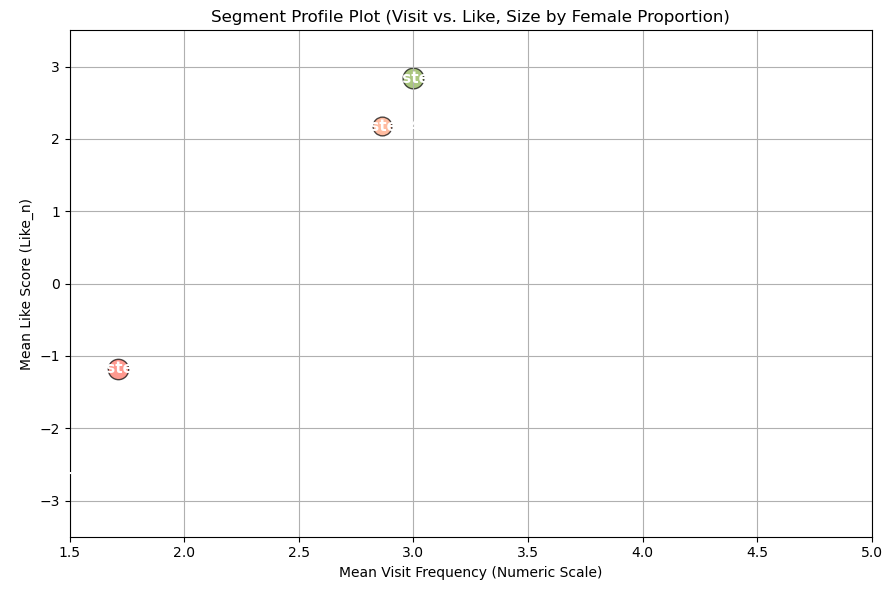

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_k4_model = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans_k4_labels = kmeans_k4_model.fit_predict(md_x)

analysis_df = mcdonalds.copy()
analysis_df['k4_cluster'] = kmeans_k4_labels

visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
analysis_df['VisitFrequency_numeric'] = analysis_df['VisitFrequency'].map(visit_freq_mapping)

visit_means = analysis_df.groupby('k4_cluster')['VisitFrequency_numeric'].mean()
print("Mean VisitFrequency (numeric) per cluster (k4):\n", visit_means)
print("-" * 30)

if 'Like_n' not in analysis_df.columns:
    def convert_like_to_numeric(value):
        if isinstance(value, (int, float)):
            return value
        if isinstance(value, str):
            value = value.strip()
            if 'I hate it!' in value or 'I love it!' in value:
                try:
                    return int(value.split('!')[-1])
                except:
                    return np.nan
            try:
                return int(value)
            except ValueError:
                return np.nan
        return np.nan

    analysis_df['Like_n'] = analysis_df['Like'].apply(convert_like_to_numeric)

    if analysis_df['Like_n'].isnull().any():
        median_like_n = analysis_df['Like_n'].median()
        analysis_df['Like_n'].fillna(median_like_n, inplace=True)
        print(f"Filled NaNs in 'Like_n' with median: {median_like_n:.2f}")

like_means = analysis_df.groupby('k4_cluster')['Like_n'].mean()
print("Mean Like_n per cluster (k4):\n", like_means)
print("-" * 30)

analysis_df['Female_numeric'] = (analysis_df['Gender'] == 'Female').astype(int)

female_means = analysis_df.groupby('k4_cluster')['Female_numeric'].mean()
print("Mean proportion of Females per cluster (k4):\n", female_means)
print("-" * 30)

plot_visit = visit_means.values
plot_like = like_means.values
plot_female_prop = female_means.values

base_size = 40
scale_factor = 300
point_sizes = base_size + (plot_female_prop * scale_factor)

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A']

plt.figure(figsize=(9, 6))
for i in range(4):
    plt.scatter(plot_visit[i], plot_like[i], s=point_sizes[i], c=colors[i], alpha=0.7, edgecolor='black')
    plt.text(plot_visit[i], plot_like[i], f"Cluster {i+1}", fontsize=11, ha='center', va='center', color='white', weight='bold')

plt.xlabel("Mean Visit Frequency (Numeric Scale)")
plt.ylabel("Mean Like Score (Like_n)")
plt.title("Segment Profile Plot (Visit vs. Like, Size by Female Proportion)")
plt.xlim(1.5, 5)
plt.ylim(-3.5, 3.5)
plt.grid(True)
plt.tight_layout()
plt.show()
